# Importing Necessary Libraries

In [55]:
#Importing all the necessary libraries that will be used in the Project.
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt

In [56]:
#After Importing Libraries, We will also import the dataset that will be used.
data= pd.read_csv('/Users/dhruvrao/Downloads/Loan.csv')

In [57]:
#Printing the dataset
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [58]:
#Printing the information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
# Printing the description of data in the dataframe.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Visualization

<AxesSubplot:>

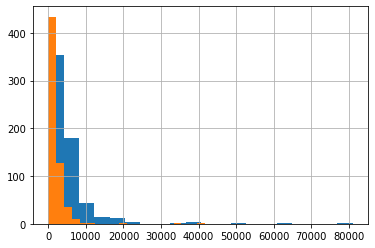

In [60]:
#Visualizing the distribution of numerical variable using histogram.
data['ApplicantIncome'].hist(bins=20)
data['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

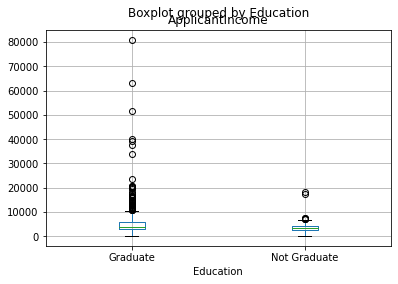

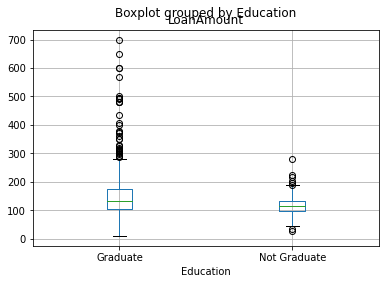

In [61]:
#Visualizing the distribution of numerical variable for an Outlier using boxplot.
data.boxplot(column='ApplicantIncome', by='Education')
data.boxplot(column='LoanAmount', by='Education')

In [62]:
#Printing all the features of the dataset.
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Checking and Dealing with Null Values

In [63]:
# Exploring if there is any null value that exist in our dataset.
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
#Printing the total number of null value in dataset.
data.isnull().sum().sum()

149

In [65]:
#Imputation for categorical variables performed using mode(Note: We can also use mean for it).
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [66]:
# Re-checking if there is any value exist in our dataset.
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
# Deleting the Unnecessary columns from our dataset.
data = data.drop(columns=['Loan_ID'],axis=1)

In [68]:
#Changing the values in Numerical data to make computation faster and easy to handle.
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},
        'Self_Employed':{'No':0,'Yes':1},
        'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
        'Education':{'Graduate':1,'Not Graduate':0},
        'Dependents':{'0':0,'1':1,'2':2,'3+':4},
        "Loan_Status":{'N':0,'Y':1}},inplace=True)

# Heatmap Analysis

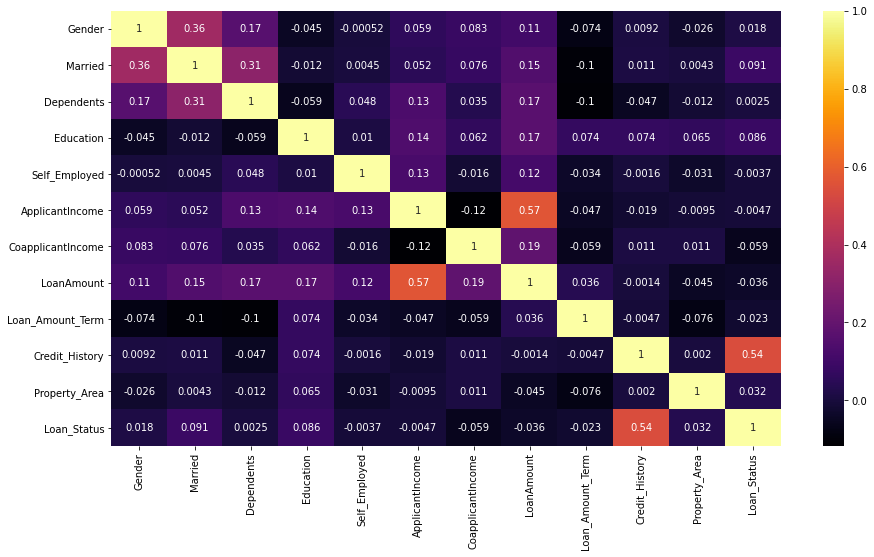

In [69]:
#Visualizing the co-realtion between the features using Heatmap so as to communicate to large volume of data instantly.
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

In [70]:
#Seprating the featutres into dependent and independent variable.
X = data.drop(columns=['Loan_Status'],axis=1)
y = data['Loan_Status']

# Splitting into Training and Testing data

In [71]:
# Finally splitting the data into training and testing. The data is splittes as 80%: Training and 20%: Testing.
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=2)

In [74]:
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [49]:
#Performing data normalization to normalize the range of independent variables or features of data.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Logistic Regression Model

In [50]:
op = LogisticRegression(random_state=1)
op.fit(X_train_scaled, y_train)

y_pred = op.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

# applying k-fold cross validation
accuracy = cross_val_score(estimator = op, X = X_train_scaled, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))

80.48780487804879
Accuracy: 81.06 %


# Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

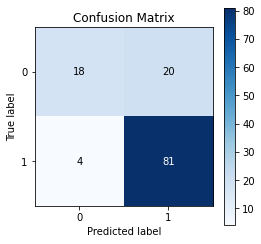

In [51]:
#Plotting a confusion matrix so as to derive the effectness of the classification algorithm.
#Also to predict correctness of our Model.
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(4,4))

# Precision, Recall and f1-score

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



# Naive Bayes Classifier

In [52]:
op = GaussianNB()
op.fit(X_train_scaled, y_train)
y_pred = op.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

# applying k-fold cross validation
accuracy = cross_val_score(estimator = op, X = X_train_scaled, y = y_train, cv = 5)
print("Accuracy: {:.3f} %".format(accuracy.mean()*100))

80.48780487804879
Accuracy: 79.219 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

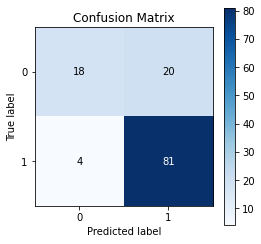

In [76]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(4,4))

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123

